Scores at iteration 0: [0.2 0.2 0.2 0.2 0.2]
Scores at iteration 1: [0.54 0.37 0.37 0.37 0.37]
Scores at iteration 2: [0.9735 0.659  0.659  0.8035 0.8035]
Scores at iteration 3: [1.833275 1.273125 1.39595  1.54045  1.417625]
Scores at iteration 4: [3.60809625 2.52594    2.54436375 2.793265   2.67044   ]
Scores at iteration 5: [6.71403344 4.56698444 4.67414925 5.36675581 5.24393081]
Scores at iteration 6: [12.44670607  8.5647693   9.04908363 10.19426961  9.61886519]
Scores at iteration 7: [23.66690416 16.38685026 16.87116459 18.78573558 17.88975407]
Scores at iteration 8: [44.26718786 30.33836514 31.2041662  35.3531595  34.07569126]
Scores at iteration 9: [82.39133722 56.60372685 59.04452315 66.62144725 63.44472005]
Scores at iteration 10: [154.95924266 106.84607484 110.5862422  123.99064867 118.17580445]
Scores at iteration 11: [290.23952085 199.42035724 205.87148516 232.19479004 222.56451987]
Scores at iteration 12: [541.89363758 372.38633392 386.57541342 435.91343461 416.24089638]
Sc

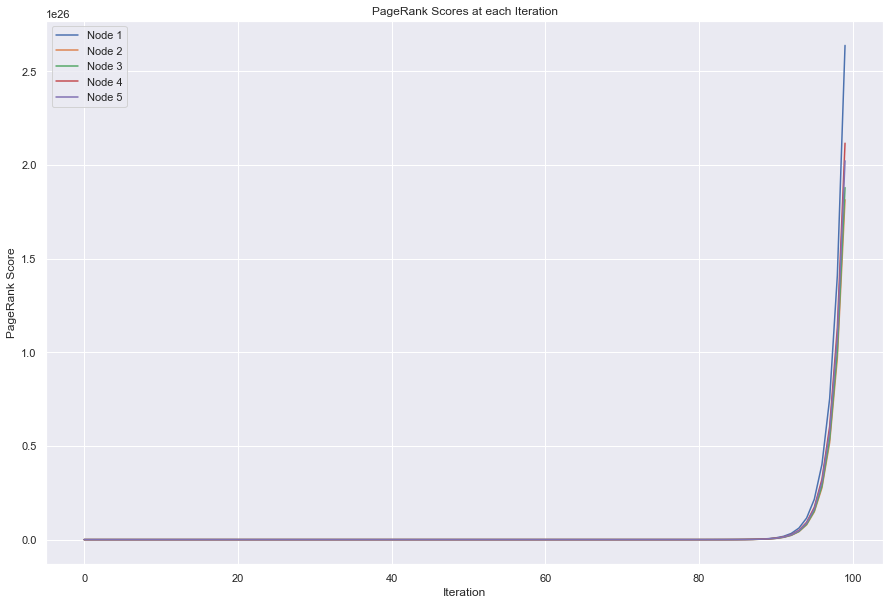

In [1]:
import numpy as np

def pagerank_original(adj_matrix, damping_factor=0.85, epsilon=1e-8, max_iterations=100):
    """
    Compute PageRank using the power iteration method.

    Parameters:
    - adj_matrix: The adjacency matrix representing the link structure of the web graph.
    - damping_factor: The probability of following a link (typically set to 0.85).
    - epsilon: Convergence threshold.
    - max_iterations: Maximum number of iterations.

    Returns:
    - A vector representing the PageRank scores for each node.
    """
    # Input validation
    if not isinstance(adj_matrix, np.ndarray) or adj_matrix.ndim != 2 or adj_matrix.shape[0] != adj_matrix.shape[1]:
        raise ValueError("Input must be a square numpy array representing the adjacency matrix of a graph.")

    n = len(adj_matrix)
    #print(n)

    # Initialize PageRank scores
    pagerank_scores = np.ones(n) / n
    # Initialize a counter
    iteration_count = 0
    # Initialize a vector to store the scores at each iteration
    scores_at_each_iteration = []

    for _ in range(max_iterations):
        prev_pagerank_scores = pagerank_scores.copy()
        print(f'Scores at iteration {iteration_count}: {pagerank_scores}')

        #capture the scores at each iteration
        scores_at_each_iteration.append(pagerank_scores)

        # Perform the power iteration
        pagerank_scores = (1 - damping_factor) / n + damping_factor * np.dot(adj_matrix, pagerank_scores)
        iteration_count += 1

        # if all pagerank scores are equal, then the pagerank scores have converged
        if (np.all(pagerank_scores == pagerank_scores[0])):
            print(f'All scores already equal at iteration {iteration_count}, breaking')
            break

        # Check for convergence
        elif np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1) < epsilon:
           print(f'Converged at iteration {iteration_count}, breaking')
           break

    # Normalize the scores to [0, 1] 
    normalized_scores = pagerank_scores / np.sum(pagerank_scores)
    
    return normalized_scores, scores_at_each_iteration

#M = np.array([[0, 1, 1], 
#              [1, 0, 0], 
#              [1, 1, 0]])

M = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
])
normalized_scores = pagerank_original(M)
print("Normalized PageRank Scores:", normalized_scores[0], "\n", "Sum:", np.sum(normalized_scores[0]))

# plot the scores at each iteration using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# plot the scores at each iteration
plt.figure(figsize=(15, 10))
plt.plot(normalized_scores[1])
plt.xlabel('Iteration')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores at each Iteration')
plt.legend(['Node 1', 'Node 2', 'Node 3', 'Node 4', 'Node 5'])
plt.show()




In [ ]:
# normalize the entire list of scores at each iteration
normalized_scores_at_each_iteration = []
for scores in scores_at_each_iteration:
    normalized_scores_at_each_iteration.append(scores / np.sum(scores))
    

In [15]:


def are_all_elements_equal(arr):
    return np.all(arr == arr[0])

# Example usage:
numbers_array = np.array([1, 0, 1, 1])
result = are_all_elements_equal(numbers_array)

if result:
    print("All elements are equal.")
else:
    print("Not all elements are equal.")


Not all elements are equal.


In [ ]:
# wikipedia
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    print(v)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        print(v)
    return v

M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])

v = pagerank(M, 100, 0.85)
print(v)

In [5]:
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    for i in range(num_iterations):
        v = d * (M @ v) + (1 - d) / N
    return v

M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])

v = pagerank(M, 100, 0.85)
print(v)


[3.78481722e+13 2.33914568e+13 3.78481722e+13]


In [25]:
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns normalized ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of normalized ranks such that v_i is the i-th rank from [0, 1]
    """
    N = M.shape[1]
    v = np.ones(N) / N
    for i in range(num_iterations):
        v = d * (M @ v) + (1 - d) / N

    # Normalize the scores to [0, 1]
    min_score = np.min(v)
    max_score = np.max(v)
    normalized_scores = (v - min_score) / (max_score - min_score)

    return normalized_scores

#M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])
M = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0]
])
normalized_scores = pagerank(M, 100, 0.85)
print("Normalized PageRank Scores:", normalized_scores)


Normalized PageRank Scores: [1.         0.         0.19068271 0.41643191 0.68370121]
